In [1]:
import pandas as pd
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df.shape

(13320, 9)

In [3]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
df.groupby('society').mean()

,bath,balcony,price
society,,,
3Codeli,2.000000,2.000000,58.500000
7 ise P,2.000000,1.000000,50.000000
A idse,2.000000,2.000000,50.000000
A rtsai,2.000000,1.000000,73.000000
ACersd,2.000000,2.000000,115.000000
...,...,...,...
Zonce E,3.500000,2.000000,98.750000
Zostaa,2.000000,1.000000,62.000000
i1ncyRe,2.000000,2.000000,50.000000


In [7]:
df['society'].unique

<bound method Series.unique of 0        Coomee 
1        Theanmp
2            NaN
3        Soiewre
4            NaN
          ...   
13315    ArsiaEx
13316        NaN
13317    Mahla T
13318    SollyCl
13319        NaN
Name: society, Length: 13320, dtype: object>

In [5]:
df.groupby('area_type').mean()

,bath,balcony,price
area_type,,,
Built-up Area,2.649378,1.472727,104.285498
Carpet Area,2.505747,1.402439,89.502356
Plot Area,3.893479,1.392488,208.495486
Super built-up Area,2.430386,1.658100,92.971757


In [2]:
df.drop(['society'],axis='columns',inplace=True)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
df.shape

(13320, 8)

In [3]:
df.dropna(inplace = True)
df.shape

(12710, 8)

In [4]:
import matplotlib.pyplot as plt

In [17]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [29]:
def plot_areas(df):
    fig, ax = plt.subplots()
    for area in df.area_type.unique():
        ax.scatter(df[df.area_type==area]['total_sqft'],df[df.area_type==area]['price'],label=area)
    ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

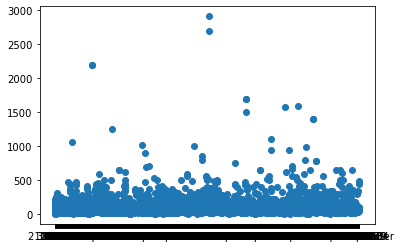

In [36]:
plt.scatter(df[df.area_type=='Super built-up  Area']['total_sqft'],df[df.area_type=='Super built-up  Area']['price'],label='area')

In [ ]:
plt.scatter(df[df.area_type=='Super built-up  Area']['total_sqft'],df[df.area_type=='Super built-up  Area']['price'],label='area')

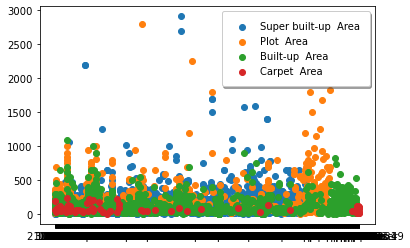

In [30]:
plot_areas(df)

In [33]:
def label_area(x):
    if x == 'Carpet  Area':
        return 0
    elif x == 'Built-up  Area':
        return 1
    elif x == 'Plot  Area':
        return 2
    else :
        return 4
df['Area'] = df.area_type.apply(label_area)
df.groupby('area_type').mean()

,bath,balcony,price,Area
area_type,,,,
Built-up Area,2.586147,1.472727,99.646126,1
Carpet Area,2.402439,1.402439,81.764695,0
Plot Area,3.712575,1.392488,196.560484,2
Super built-up Area,2.390638,1.658059,88.440469,4


In [34]:
df.groupby('Area').mean()

,bath,balcony,price
Area,,,
0,2.402439,1.402439,81.764695
1,2.586147,1.472727,99.646126
2,3.712575,1.392488,196.560484
4,2.390638,1.658059,88.440469


In [37]:
df.groupby('Area').describe()

bath                                               balcony            \
       count      mean       std  min  25%  50%  75%   max   count      mean   
Area                                                                           
0       82.0  2.402439  0.940971  1.0  2.0  2.0  3.0   5.0    82.0  1.402439   
1     2310.0  2.586147  1.179138  1.0  2.0  2.0  3.0  10.0  2310.0  1.472727   
2     1837.0  3.712575  1.859768  1.0  3.0  4.0  4.0  40.0  1837.0  1.392488   
4     8481.0  2.390638  0.897114  1.0  2.0  2.0  3.0  27.0  8481.0  1.658059   

      ...             price                                                   \
      ...  75%  max   count        mean         std   min       25%      50%   
Area  ...                                                                      
0     ...  2.0  3.0    82.0   81.764695   52.330564  13.0  47.10125   68.545   
1     ...  2.0  3.0  2310.0   99.646126   98.594752   9.0  46.00000   68.000   
2     ...  2.0  3.0  1837.0  196.560484  219.952174  10.5  80.00000  135.000   
4     ...  2.0  3.0  8481.0   88.440469  103.786966   8.0  47.00000   65.000   

                      
         75%     max  
Area                  
0     100.00   240.0  
1     113.75  1100.0  
2     230.00  2800.0  
4      95.00  2912.0  

[4 rows x 24 columns]

In [6]:
df.drop(['area_type'],axis='columns',inplace=True)
df.head()

,availability,location,size,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [39]:
df.groupby('availability').mean()

,bath,balcony,price
availability,,,
14-Jul,2.000000,2.000000,43.710000
14-Nov,3.000000,2.000000,43.710000
15-Aug,2.000000,2.000000,62.000000
15-Dec,2.000000,0.000000,130.000000
15-Jun,2.000000,0.000000,97.000000
...,...,...,...
22-Jun,2.421053,1.842105,107.224737
22-Mar,1.666667,1.333333,49.000000
22-May,3.875000,1.750000,220.687500


In [7]:
df.drop(['availability'],axis='columns',inplace= True)

In [44]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [8]:
df['Size'] = df['size'].apply(lambda x: float(x.split(' ')[0]))
df.head()

,location,size,total_sqft,bath,balcony,price,Size
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0


In [9]:
df.drop(['size'],axis='columns',inplace = True)
df.head()

,location,total_sqft,bath,balcony,price,Size
0,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Kothanur,1200,2.0,1.0,51.00,2.0


In [10]:
df.dtypes

location       object
total_sqft     object
bath          float64
balcony       float64
price         float64
Size          float64
dtype: object

In [10]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def total_sqft_float(x):
    try:
        return float(x)
    except :
        z = x.split('-')
        if len(z) == 2:
            return (float(z[0])+float(z[1]))/2
        else :
            return None

In [12]:
df['Totalsqft'] = df['total_sqft'].apply(total_sqft_float)
df.head()

,location,total_sqft,bath,balcony,price,Size,Totalsqft
0,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,1056.0
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0,2600.0
2,Uttarahalli,1440,2.0,3.0,62.00,3.0,1440.0
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0,1521.0
4,Kothanur,1200,2.0,1.0,51.00,2.0,1200.0


In [22]:
df.iloc[27]

location        Yelahanka
total_sqft    2100 - 2850
bath                    4
balcony                 0
price                 186
Size                    4
Totalsqft            2475
Name: 30, dtype: object

In [13]:
df.drop(['total_sqft'],axis='columns',inplace = True)

In [14]:
df.isnull().sum()

location      0
bath          0
balcony       0
price         0
Size          0
Totalsqft    42
dtype: int64

In [15]:
df.dropna(inplace = True)

In [16]:
df['price/sqft'] = df['price']*100000/df['Totalsqft']
df.head()

,location,bath,balcony,price,Size,Totalsqft,price/sqft
0,Electronic City Phase II,2.0,1.0,39.07,2.0,1056.0,3699.810606
1,Chikka Tirupathi,5.0,3.0,120.00,4.0,2600.0,4615.384615
2,Uttarahalli,2.0,3.0,62.00,3.0,1440.0,4305.555556
3,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0,6245.890861
4,Kothanur,2.0,1.0,51.00,2.0,1200.0,4250.000000


In [28]:
len(df.location.unique())

1259

In [17]:
locations = df.groupby('location')['location'].count().sort_values(ascending = False)

In [47]:
locations

location
Whitefield                 513
Sarjapur  Road             372
Electronic City            300
Kanakpura Road             259
Thanisandra                230
                          ... 
Kenchanehalli R R Nagar      1
Keerthi Layout               1
Kathriguppe IV Phase         1
Karnataka Shabarimala        1
 Anekal                      1
Name: location, Length: 1259, dtype: int64

In [18]:
locations_greater = locations[locations>10]

In [19]:
def remove_locations(x):
    if x in locations_greater:
        return x
    else:
        return 'other'

In [20]:
df['Locations'] = df['location'].apply(remove_locations)

In [21]:
df[df.location=='Karnataka Shabarimala']

,location,bath,balcony,price,Size,Totalsqft,price/sqft,Locations
3917,Karnataka Shabarimala,6.0,3.0,70.0,4.0,1200.0,5833.333333,other


In [52]:
df.groupby('Locations')['Locations'].count()

Locations
 Devarachikkanahalli           14
1st Block Jayanagar            12
1st Phase JP Nagar             21
2nd Phase Judicial Layout      11
2nd Stage Nagarbhavi           23
                             ... 
Yelahanka                     206
Yelahanka New Town             40
Yelenahalli                    12
Yeshwanthpur                   78
other                        2756
Name: Locations, Length: 236, dtype: int64

In [22]:
df.drop(['location'],axis='columns',inplace=True)

In [23]:
df.dtypes

bath          float64
balcony       float64
price         float64
Size          float64
Totalsqft     float64
price/sqft    float64
Locations      object
dtype: object

In [24]:
df['bedrooms'] = df['Size']
df.head()

,bath,balcony,price,Size,Totalsqft,price/sqft,Locations,bedrooms
0,2.0,1.0,39.07,2.0,1056.0,3699.810606,Electronic City Phase II,2.0
1,5.0,3.0,120.00,4.0,2600.0,4615.384615,Chikka Tirupathi,4.0
2,2.0,3.0,62.00,3.0,1440.0,4305.555556,Uttarahalli,3.0
3,3.0,1.0,95.00,3.0,1521.0,6245.890861,Lingadheeranahalli,3.0
4,2.0,1.0,51.00,2.0,1200.0,4250.000000,Kothanur,2.0


In [25]:
df.drop(['Size'],axis='columns',inplace=True)

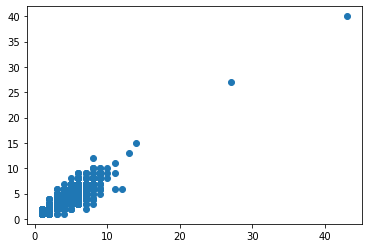

In [67]:
plt.scatter(df['bedrooms'],df['bath'],label='avg')

In [73]:
df[df.bath==40]

,bath,balcony,price,Totalsqft,price/sqft,Locations,bedrooms
4684,40.0,0.0,660.0,2400.0,27500.0,Munnekollal,43.0


In [68]:
len(df[df.bath>df.bedrooms+2])

8

In [69]:
df.shape

(12668, 7)

In [26]:
df1 = df[~(df.bath>df.bedrooms+2)]
df1.shape

(12660, 7)

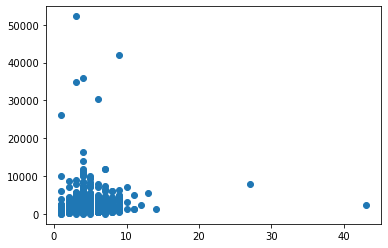

In [78]:
plt.scatter(df1['bedrooms'],df1['Totalsqft'])

In [79]:
len(df1[df1['Totalsqft']/df1['bedrooms'] < 300])

652

In [27]:
df2 = df1[~(df1['Totalsqft']/df1['bedrooms'] < 300)]
df2.head()

,bath,balcony,price,Totalsqft,price/sqft,Locations,bedrooms
0,2.0,1.0,39.07,1056.0,3699.810606,Electronic City Phase II,2.0
1,5.0,3.0,120.00,2600.0,4615.384615,Chikka Tirupathi,4.0
2,2.0,3.0,62.00,1440.0,4305.555556,Uttarahalli,3.0
3,3.0,1.0,95.00,1521.0,6245.890861,Lingadheeranahalli,3.0
4,2.0,1.0,51.00,1200.0,4250.000000,Kothanur,2.0


In [80]:
df1.groupby('bedrooms').mean()

,bath,balcony,price,Totalsqft,price/sqft
bedrooms,,,,,
1.0,1.057903,0.777778,44.131362,751.371252,6545.541418
2.0,1.980625,1.431000,59.460467,1137.514967,5177.766163
3.0,2.752102,1.825825,109.039921,1659.494145,6535.288729
4.0,4.049433,1.696110,257.097079,2611.844992,10597.411276
5.0,4.605442,1.636054,255.316327,2222.371599,13960.235679
6.0,5.500000,1.797872,224.005319,1995.792394,12480.723815
7.0,6.247059,1.976471,247.247059,2285.047059,38698.374628
8.0,6.969697,1.727273,189.515152,1878.954545,12378.003423
9.0,8.121212,1.939394,230.696970,3413.333333,12352.297115


In [82]:
df2.groupby('bedrooms').mean()

,bath,balcony,price,Totalsqft,price/sqft
bedrooms,,,,,
1.0,1.056782,0.779180,44.283991,755.893107,6159.211113
2.0,1.984715,1.435175,59.669848,1142.258450,5168.774872
3.0,2.749780,1.837071,109.623284,1679.610013,6272.959984
4.0,4.113051,1.727022,278.160207,2857.378419,9985.267322
5.0,4.809816,1.711656,347.966258,3145.203988,10842.730224
6.0,5.750000,1.710526,330.263158,3335.657500,10242.353271
7.0,6.257143,1.885714,377.942857,3855.971429,9260.875283
8.0,7.250000,1.850000,232.350000,3481.600000,6892.487205
9.0,8.400000,2.000000,347.100000,8127.000000,7890.301591


In [83]:
df2.shape

(12008, 7)

In [86]:
df2.groupby('Locations')['price/sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
Locations,,,,,,,,
Devarachikkanahalli,14.0,4969.906245,2594.870914,3185.840708,3649.081736,4305.148257,4676.936243,13333.333333
1st Block Jayanagar,9.0,13006.494074,3560.873104,6000.000000,11901.840491,12533.333333,15018.181818,18750.000000
1st Phase JP Nagar,20.0,10155.854289,5009.088003,5274.725275,7418.400287,8562.290620,10359.027338,25000.000000
2nd Phase Judicial Layout,11.0,4048.701183,674.730658,3500.000000,3500.000000,3500.000000,4739.316239,5000.000000
2nd Stage Nagarbhavi,9.0,14381.275720,5272.435848,5666.666667,14666.666667,15033.333333,18750.000000,20416.666667
...,...,...,...,...,...,...,...,...
Yelahanka,202.0,5187.098239,1742.196255,371.428571,4294.172829,5025.592307,5849.968314,19875.776398
Yelahanka New Town,38.0,5860.659870,3889.233175,1875.000000,3776.785714,5040.025016,5413.853463,22475.000000
Yelenahalli,12.0,4026.305111,554.557709,3125.000000,3800.000000,3817.812500,4154.738878,5176.876618


In [96]:
df2['price/sqft'][df2.Locations==' Devarachikkanahalli']

152       3520.000000
341       3200.000000
2474      6916.666667
5030      3418.803419
5536     13333.333333
5771      4561.403509
6591      4540.654699
7536      3185.840708
7767      5363.443896
8268      4715.447154
8954      4398.826979
9894      4211.469534
10582     4036.326942
11101     4176.470588
Name: price/sqft, dtype: float64

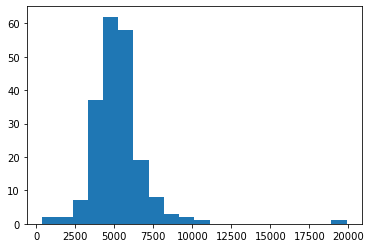

In [98]:
plt.hist(df2['price/sqft'][df2.Locations=='Yelahanka'], bins = 20)
plt.show()

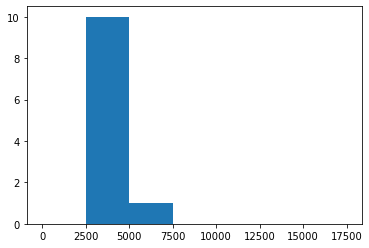

In [100]:
plt.hist(df2['price/sqft'][df2.Locations=='2nd Phase Judicial Layout'], bins = range(0,20000,2500))
plt.show()

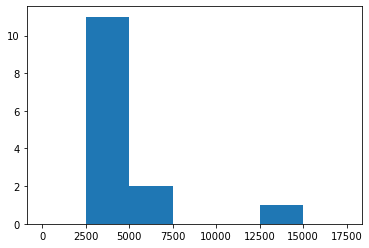

In [101]:
plt.hist(df2['price/sqft'][df2.Locations==' Devarachikkanahalli'], bins = range(0,20000,2500))
plt.show()

(array([  82., 5177., 4495., 1107.,  472.,  257.,  191.]),
 array([    0,  2500,  5000,  7500, 10000, 12500, 15000, 17500]),
 <BarContainer object of 7 artists>)

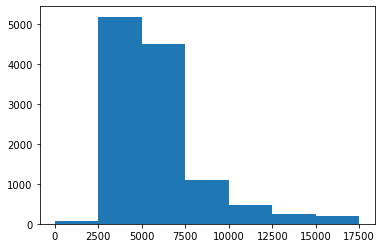

In [103]:
plt.hist(df2['price/sqft'], bins = range(0,20000,2500))

In [122]:
for key ,subdf in df2.groupby('Locations'):
    print(subdf)

       bath  balcony  price  Totalsqft    price/sqft             Locations  \
152     2.0      3.0   44.0     1250.0   3520.000000   Devarachikkanahalli   
341     2.0      2.0   40.0     1250.0   3200.000000   Devarachikkanahalli   
2474    2.0      2.0   83.0     1200.0   6916.666667   Devarachikkanahalli   
5030    2.0      2.0   40.0     1170.0   3418.803419   Devarachikkanahalli   
5536    3.0      1.0  160.0     1200.0  13333.333333   Devarachikkanahalli   
5771    2.0      2.0   65.0     1425.0   4561.403509   Devarachikkanahalli   
6591    2.0      2.0   43.0      947.0   4540.654699   Devarachikkanahalli   
7536    2.0      2.0   36.0     1130.0   3185.840708   Devarachikkanahalli   
7767    2.0      2.0   76.0     1417.0   5363.443896   Devarachikkanahalli   
8268    2.0      1.0   58.0     1230.0   4715.447154   Devarachikkanahalli   
8954    3.0      2.0   75.0     1705.0   4398.826979   Devarachikkanahalli   
9894    2.0      1.0   47.0     1116.0   4211.469534   Devarachi

       bath  balcony   price  Totalsqft   price/sqft    Locations  bedrooms
347     3.0      1.0   49.36     1260.0  3917.460317  Bommasandra       3.0
422     2.0      1.0   26.50     1060.0  2500.000000  Bommasandra       2.0
564     2.0      1.0   28.15     1126.0  2500.000000  Bommasandra       2.0
655     3.0      2.0   46.00     1200.0  3833.333333  Bommasandra       3.0
1150    2.0      1.0   41.00     1035.0  3961.352657  Bommasandra       2.0
1818    2.0      1.0   41.73     1035.0  4031.884058  Bommasandra       2.0
2016    2.0      3.0   40.00     1034.0  3868.471954  Bommasandra       2.0
2254    2.0      2.0   30.00      877.0  3420.752566  Bommasandra       2.0
3165    3.0      2.0   80.00     1447.0  5528.680028  Bommasandra       3.0
3287    2.0      1.0   37.46      920.0  4071.739130  Bommasandra       2.0
3374    2.0      1.0   41.43     1035.0  4002.898551  Bommasandra       2.0
3763    2.0      2.0   49.00      902.0  5432.372506  Bommasandra       2.0
3863    2.0 

       bath  balcony   price  Totalsqft    price/sqft Locations  bedrooms
48      1.0      1.0  130.00      800.0  16250.000000  KR Puram       2.0
188     2.0      0.0   56.80     1277.5   4446.183953  KR Puram       2.0
368     2.0      2.0   39.00      930.0   4193.548387  KR Puram       2.0
525     2.0      2.0   42.74     1155.0   3700.432900  KR Puram       2.0
868     2.0      1.0   46.55     1225.0   3800.000000  KR Puram       2.0
...     ...      ...     ...        ...           ...       ...       ...
12804   2.0      1.0   39.90     1100.0   3627.272727  KR Puram       2.0
12977   6.0      1.0  110.00     2800.0   3928.571429  KR Puram       7.0
13077   2.0      2.0   39.00     1020.0   3823.529412  KR Puram       2.0
13249   2.0      0.0   75.00     1200.0   6250.000000  KR Puram       2.0
13267   2.0      1.0   60.00     1245.0   4819.277108  KR Puram       2.0

[78 rows x 7 columns]
       bath  balcony  price  Totalsqft    price/sqft         Locations  \
3162    3.0    

13318       4.0  
       bath  balcony  price  Totalsqft    price/sqft   Locations  bedrooms
1272    2.0      2.0   35.0     1006.0   3479.125249  Pai Layout       2.0
2534    2.0      2.0   90.0     1550.0   5806.451613  Pai Layout       3.0
2729    2.0      2.0   40.0     1050.0   3809.523810  Pai Layout       2.0
3061    2.0      3.0   67.0     1400.0   4785.714286  Pai Layout       3.0
3788    2.0      2.0   50.0     1100.0   4545.454545  Pai Layout       2.0
3988    2.0      1.0   80.0     1255.0   6374.501992  Pai Layout       2.0
4471    2.0      2.0   35.0     1075.0   3255.813953  Pai Layout       2.0
6517    2.0      2.0   57.5     1400.0   4107.142857  Pai Layout       2.0
6901    2.0      2.0   60.0     1175.0   5106.382979  Pai Layout       2.0
7223    2.0      2.0   34.5      810.0   4259.259259  Pai Layout       2.0
8143    2.0      1.0   72.0      780.0   9230.769231  Pai Layout       2.0
8735    2.0      2.0   34.0     1000.0   3400.000000  Pai Layout       2.0
10716  

In [28]:
import numpy as np

In [29]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key ,subdf in df.groupby('Locations'):
        mean = np.mean(subdf['price/sqft'])
        std = np.std(subdf['price/sqft'])
        reduced_df = subdf[(subdf['price/sqft']<=(std+mean)) & (subdf['price/sqft']>=(mean-std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [30]:
df4 = remove_outliers(df2)
df4.shape

(9849, 7)

In [109]:
dummies = pd.get_dummies(df2['Locations'])
dummies.drop(['other'],axis='columns',inplace=True)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
df3 = pd.concat([df2,dummies],axis='columns')
df3.head(1)

,bath,balcony,price,Totalsqft,price/sqft,Locations,bedrooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.0,1.0,39.07,1056.0,3699.810606,Electronic City Phase II,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
df3.drop(['Locations'],axis='columns',inplace=True)

In [113]:
df3.drop(['price/sqft'],axis='columns',inplace=True)

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [106]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5)

In [116]:
cross_val_score(LinearRegression(),df3.drop(['price'],axis='columns'),df3.price,cv=5)

array([0.2801238 , 0.51583207, 0.25057128, 0.50021837, 0.45919334])

In [82]:
from sklearn.linear_model import Lasso

In [118]:
cross_val_score(Lasso(),df3.drop(['price'],axis='columns'),df3.price,cv=5)

array([0.16663046, 0.45905466, 0.18418063, 0.42791069, 0.42724439])

In [32]:
df5  = df4.drop(['Locations','price/sqft'],axis='columns')
df5.shape

(9849, 5)

In [33]:
df6 = df5.join(dummies)
df6.shape

(9849, 241)

In [31]:
dummies = pd.get_dummies(df4['Locations'])
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [149]:
cross_val_score(LinearRegression(),df6.drop(['price'],axis='columns'),df6.price,cv=5)

array([0.50890744, 0.72293111, 0.59981064, 0.79854679, 0.71792337])

In [147]:
df6.isnull().sum()

bath                  0
balcony               0
price                 0
Totalsqft             0
bedrooms              0
                     ..
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
other                 0
Length: 241, dtype: int64

In [34]:
df6.drop(['other'],axis='columns',inplace=True)

In [35]:
df6.head()

,bath,balcony,price,Totalsqft,bedrooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.0,3.0,44.0,1250.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2.0,40.0,1250.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,83.0,1200.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1170.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,65.0,1425.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df5.head()

,bath,balcony,price,Totalsqft,bedrooms
0,2.0,3.0,44.0,1250.0,3.0
1,2.0,2.0,40.0,1250.0,2.0
2,2.0,2.0,83.0,1200.0,2.0
3,2.0,2.0,40.0,1170.0,2.0
4,2.0,2.0,65.0,1425.0,3.0


In [43]:
df4.head()

,bath,balcony,price,Totalsqft,price/sqft,Locations,bedrooms
0,2.0,3.0,44.0,1250.0,3520.000000,Devarachikkanahalli,3.0
1,2.0,2.0,40.0,1250.0,3200.000000,Devarachikkanahalli,2.0
2,2.0,2.0,83.0,1200.0,6916.666667,Devarachikkanahalli,2.0
3,2.0,2.0,40.0,1170.0,3418.803419,Devarachikkanahalli,2.0
4,2.0,2.0,65.0,1425.0,4561.403509,Devarachikkanahalli,3.0


In [44]:
df4.shape

(9849, 7)

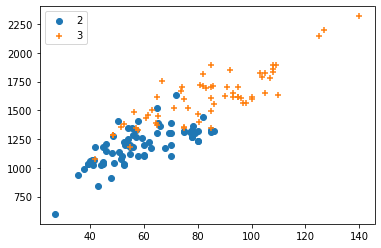

In [51]:
plt.scatter(df4['price'][(df4.bedrooms == 2) & (df4['Locations'] == 'Yelahanka')],df4['Totalsqft'][(df4.bedrooms == 2) & (df4['Locations'] == 'Yelahanka')],label = '2')
plt.scatter(df4['price'][(df4.bedrooms == 3) & (df4['Locations'] == 'Yelahanka')],df4['Totalsqft'][(df4.bedrooms == 3) & (df4['Locations'] == 'Yelahanka')],label = '3', marker='+')
plt.legend()

In [60]:
for key , subdf in df4.groupby('Locations'):
    for key2 , subdf2 in subdf.groupby('bedrooms'):
        print(key2)

2.0
3.0
2.0
3.0
4.0
1.0
2.0
3.0
4.0
2.0
3.0
4.0
6.0
1.0
2.0
3.0
5.0
2.0
3.0
1.0
2.0
3.0
4.0
1.0
2.0
3.0
4.0
5.0
1.0
2.0
3.0
4.0
2.0
3.0
1.0
2.0
3.0
6.0
8.0
2.0
3.0
1.0
2.0
3.0
4.0
2.0
3.0
4.0
1.0
2.0
3.0
2.0
3.0
4.0
1.0
2.0
3.0
1.0
2.0
3.0
4.0
2.0
3.0
4.0
2.0
3.0
4.0
1.0
2.0
3.0
4.0
1.0
2.0
3.0
4.0
2.0
3.0
2.0
3.0
5.0
1.0
2.0
3.0
6.0
2.0
3.0
2.0
3.0
1.0
2.0
1.0
2.0
3.0
4.0
2.0
3.0
4.0
5.0
2.0
3.0
4.0
6.0
2.0
3.0
2.0
3.0
4.0
2.0
3.0
5.0
2.0
3.0
2.0
3.0
4.0
1.0
2.0
3.0
4.0
5.0
2.0
3.0
4.0
2.0
3.0
5.0
2.0
3.0
2.0
3.0
4.0
2.0
3.0
4.0
1.0
2.0
3.0
4.0
2.0
3.0
4.0
2.0
3.0
2.0
3.0
4.0
2.0
3.0
1.0
2.0
3.0
4.0
2.0
3.0
1.0
2.0
3.0
4.0
8.0
2.0
3.0
2.0
3.0
3.0
4.0
2.0
3.0
4.0
5.0
1.0
2.0
3.0
1.0
2.0
3.0
1.0
2.0
3.0
4.0
1.0
2.0
3.0
2.0
3.0
4.0
6.0
3.0
4.0
2.0
3.0
5.0
8.0
2.0
3.0
2.0
3.0
4.0
2.0
3.0
2.0
3.0
3.0
4.0
1.0
2.0
3.0
2.0
3.0
1.0
2.0
3.0
5.0
2.0
3.0
2.0
3.0
1.0
2.0
3.0
1.0
2.0
3.0
2.0
3.0
4.0
2.0
3.0
4.0
1.0
2.0
3.0
4.0
1.0
2.0
3.0
4.0
1.0
2.0
3.0
1.0
2.0
3.0
4.0
2.0
3.0
2.0
3.0
3.0
4.0
6.0


In [70]:
def remove_price_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby(['Locations']):
        means = []
        for key2 , subdf2 in subdf.groupby('bedrooms'):
            means.append(np.mean(subdf2['price/sqft']))
        count = 0
        first_turn = True
        for key2 , subdf2 in subdf.groupby('bedrooms'):
            if first_turn == True:
                first_turn = False
                continue
            reduced_df = subdf2[~(means[count]>=subdf2['price/sqft'])]
#             print('reduced_df')
            df_out = pd.concat([df_out,reduced_df])
            count += 1
    return df_out

In [71]:
df7 = remove_price_outliers(df4)
df7.shape

(4035, 7)

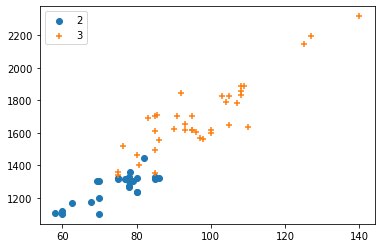

In [74]:
plt.scatter(df7['price'][(df4.bedrooms == 2) & (df7['Locations'] == 'Yelahanka')],df7['Totalsqft'][(df7.bedrooms == 2) & (df7['Locations'] == 'Yelahanka')],label = '2')
plt.scatter(df7['price'][(df4.bedrooms == 3) & (df7['Locations'] == 'Yelahanka')],df7['Totalsqft'][(df7.bedrooms == 3) & (df7['Locations'] == 'Yelahanka')],label = '3', marker='+')
plt.legend()

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [77]:
dummies = pd.get_dummies(df7['Locations'])
dummies.drop(['other'],axis='columns',inplace=True)
dummies.shape

(4035, 219)

In [78]:
df8 = df7.join(dummies)
df8.shape

(4035, 226)

In [79]:
df8.head()

,bath,balcony,price,Totalsqft,price/sqft,Locations,bedrooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
4,2.0,2.0,65.0,1425.0,4561.403509,Devarachikkanahalli,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2.0,2.0,76.0,1417.0,5363.443896,Devarachikkanahalli,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3.0,2.0,75.0,1705.0,4398.826979,Devarachikkanahalli,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2.0,3.0,235.0,1875.0,12533.333333,1st Block Jayanagar,3.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,4.0,1.0,428.0,2850.0,15017.543860,1st Block Jayanagar,4.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df8.drop(['Locations','price/sqft'],axis='columns',inplace=True)
df8.head()

,bath,balcony,price,Totalsqft,bedrooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
4,2.0,2.0,65.0,1425.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2.0,2.0,76.0,1417.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3.0,2.0,75.0,1705.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2.0,3.0,235.0,1875.0,3.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,4.0,1.0,428.0,2850.0,4.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
plt.scatter()

In [100]:
X = df8.drop(['price'],axis='columns')
X.head()

,bath,balcony,Totalsqft,bedrooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
4,2.0,2.0,1425.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2.0,2.0,1417.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3.0,2.0,1705.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2.0,3.0,1875.0,3.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,4.0,1.0,2850.0,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
max1 = X.Totalsqft.max()

In [107]:
X.Totalsqft = X.Totalsqft.apply(lambda x: x/max1)
X.head()

,bath,balcony,Totalsqft,bedrooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
4,2.0,2.0,0.118750,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2.0,2.0,0.118083,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3.0,2.0,0.142083,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2.0,3.0,0.156250,3.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,4.0,1.0,0.237500,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
cross_val_score(LinearRegression(normalize = False),X.drop(['balcony'],axis='columns'),df8.price,cv=3)

array([-2.63536722e+19,  6.16443573e-01,  7.80608472e-01])

In [109]:
cross_val_score(LinearRegression(fit_intercept=True),X,df8.price,cv=3)

array([-1.02564644e+20,  6.15768285e-01,  7.81223259e-01])

In [121]:
cross_val_score(Lasso(alpha=2.5),df8.drop(['price','balcony'],axis='columns'),df8.price,cv=3)

array([0.64675621, 0.6646733 , 0.73533877])

In [122]:
cross_val_score(Lasso(alpha=10),df8.drop(['price','balcony'],axis='columns'),df8.price,cv=3)

array([0.6463803 , 0.6646675 , 0.74804855])

In [112]:
from sklearn.linear_model import Ridge

In [116]:
cross_val_scores_ridge = []
  
# List to maintain the different values of alpha
alpha = []
  
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X, df8.price)
    scores = cross_val_score(ridgeModel, X, df8.price, cv = 10)
    avg_cross_val_score = np.mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
    
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 62.68205955299517
0.5 : 62.906672186859915
0.75 : 63.03025321200128
1.0 : 63.075303108961435
1.25 : 63.05778495682088
1.5 : 62.98978037149385
1.75 : 62.88077511290173
2.0 : 62.73838252798313


In [117]:
model = LinearRegression()

In [118]:
model.fit(X, df8.price)

LinearRegression()

In [136]:
X.drop(['balcony'],axis='columns',inplace=True)

In [137]:
X.columns

Index(['bath', 'Totalsqft', 'bedrooms', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Varthur Road', 'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=222)

In [127]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

7

In [141]:
def predict_score(model,location,bedrooms,Totalsqft,bath):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[1] = Totalsqft/12000
    x[0] = bath
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [134]:
predict_score(model,'1st Phase JP Nagar',2,3,1000,2)

84.77109768461128

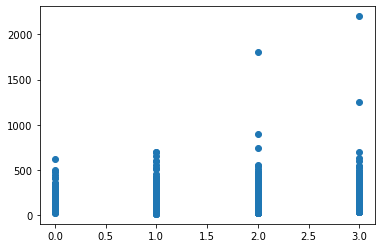

In [135]:
plt.scatter(df8.balcony,df8.price)

In [140]:
model = LinearRegression()
model.fit(X, df8.price)

LinearRegression()

In [142]:
predict_score(model,'1st Phase JP Nagar',2,1000,2)

87.24246609428843

In [144]:
predict_score(model,'1st Phase JP Nagar',3,1000,3)

85.58082810411445

In [145]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [146]:
model.coef_

array([-5.76943475e-01,  1.11223705e+03, -1.08469452e+00, -4.97576615e+01,
        1.51232497e+02,  1.20030931e+01, -6.76971874e+01,  2.52800077e+02,
       -2.94865311e+01,  9.63862149e+00, -1.22660114e+01, -6.27994633e+01,
       -3.83781694e+01, -3.71480330e+01, -4.42735267e+01, -2.21302064e+01,
       -2.88849592e+01, -3.11976736e+01, -3.88832439e+01, -4.30017912e+01,
       -3.51257043e+01, -3.94000697e+01, -5.28312570e+01, -3.35327516e+01,
       -4.41512864e+01,  9.84825148e+01, -2.73116973e+01, -5.37447182e+01,
       -1.28851813e+01, -2.97338097e+01,  1.57736881e+02, -8.70599223e+00,
       -4.47594812e+01,  1.18601983e+01, -1.33733533e+01, -7.30831765e+00,
       -2.84462717e+01,  4.00314546e+01,  2.85009189e+01, -5.96324652e+01,
       -6.68839927e+01, -6.31958510e+01, -2.69867727e+01,  2.15770505e+02,
       -2.47853792e+01, -3.92561885e+01,  2.34357088e+01, -3.57852956e+01,
       -4.59718172e+01, -5.07661711e+01, -6.82367899e+01,  1.74871879e+01,
       -2.47193564e+00, -

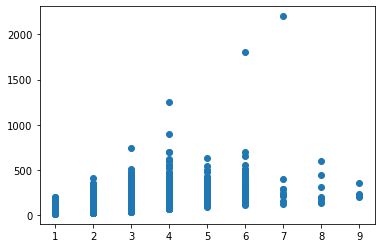

In [147]:
plt.scatter(df8.bath,df8.price)

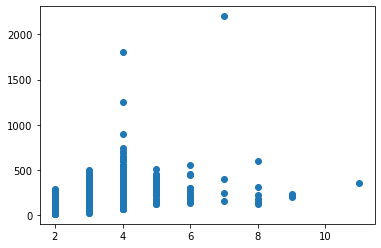

In [148]:
plt.scatter(df8.bedrooms,df8.price)

In [149]:
def remove_price_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby(['Locations']):
        means = []
        for key2 , subdf2 in subdf.groupby('bath'):
            means.append(np.mean(subdf2['price/sqft']))
        count = 0
        first_turn = True
        for key2 , subdf2 in subdf.groupby('bath'):
            if first_turn == True:
                first_turn = False
                continue
            reduced_df = subdf2[~(means[count]>=subdf2['price/sqft'])]
#             print('reduced_df')
            df_out = pd.concat([df_out,reduced_df])
            count += 1
    return df_out

In [151]:
df9 = remove_price_outliers(df7)

In [152]:
df9.shape

(1274, 7)

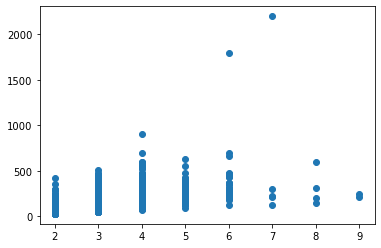

In [154]:
plt.scatter(df9.bath,df9.price)

In [155]:
df9.head()

,bath,balcony,price,Totalsqft,price/sqft,Locations,bedrooms
13,4.0,1.0,428.0,2850.0,15017.543860,1st Block Jayanagar,4.0
18,4.0,0.0,413.0,2750.0,15018.181818,1st Block Jayanagar,4.0
19,4.0,2.0,368.0,2450.0,15020.408163,1st Block Jayanagar,4.0
21,3.0,1.0,167.0,1875.0,8906.666667,1st Phase JP Nagar,3.0
23,3.0,2.0,225.0,2059.0,10927.634774,1st Phase JP Nagar,3.0


In [156]:
dummies = pd.get_dummies(df9['Locations'])
df10 = df9.join(dummies)
df10.head()

,bath,balcony,price,Totalsqft,price/sqft,Locations,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,6th Phase JP Nagar,...,Ulsoor,Uttarahalli,Vidyaranyapura,Vijayanagar,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
13,4.0,1.0,428.0,2850.0,15017.543860,1st Block Jayanagar,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18,4.0,0.0,413.0,2750.0,15018.181818,1st Block Jayanagar,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19,4.0,2.0,368.0,2450.0,15020.408163,1st Block Jayanagar,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21,3.0,1.0,167.0,1875.0,8906.666667,1st Phase JP Nagar,3.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23,3.0,2.0,225.0,2059.0,10927.634774,1st Phase JP Nagar,3.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
df10.drop(['Locations','price/sqft'],axis='columns',inplace=True)

In [158]:
df10.drop(['balcony'],axis='columns',inplace=True)

In [159]:
df10.drop(['other'],axis='columns',inplace=True)

In [160]:
model = LinearRegression()
model.fit(df10.drop(['price'],axis='columns'),df10.price)

LinearRegression()

In [162]:
X = df10.drop(['price'],axis='columns')
X.columns

Index(['bath', 'Totalsqft', 'bedrooms', '1st Block Jayanagar',
       '1st Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '9th Phase JP Nagar', 'Abbigere', 'Akshaya Nagar',
       ...
       'Tumkur Road', 'Ulsoor', 'Uttarahalli', 'Vidyaranyapura', 'Vijayanagar',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yeshwanthpur'],
      dtype='object', length=152)

In [163]:
def predict_score(model,location,bedrooms,Totalsqft,bath):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[1] = Totalsqft
    x[0] = bath
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [164]:
predict_score(model,'1st Phase JP Nagar',2,1000,2)

79.62675474593715

In [ ]:
predict_price('Indira Nagar',1000, 2)